# Задание 1.1 - Метод К-ближайших соседей (K-neariest neighbor classifier)

В первом задании вы реализуете один из простейших алгоритмов машинного обучения - классификатор на основе метода K-ближайших соседей.
Мы применим его к задачам
- бинарной классификации (то есть, только двум классам)
- многоклассовой классификации (то есть, нескольким классам)

Так как методу необходим гиперпараметр (hyperparameter) - количество соседей, мы выберем его на основе кросс-валидации (cross-validation).

Наша основная задача - научиться пользоваться numpy и представлять вычисления в векторном виде, а также ознакомиться с основными метриками, важными для задачи классификации.

Перед выполнением задания:
- запустите файл `download_data.sh`, чтобы скачать данные, которые мы будем использовать для тренировки
- установите все необходимые библиотеки, запустив `pip install -r requirements.txt` (если раньше не работали с `pip`, вам сюда - https://pip.pypa.io/en/stable/quickstart/)

Если вы раньше не работали с numpy, вам может помочь tutorial. Например этот:  
http://cs231n.github.io/python-numpy-tutorial/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
from dataset import load_svhn
from knn import KNN
from metrics import binary_classification_metrics, multiclass_accuracy

# Загрузим и визуализируем данные

В задании уже дана функция `load_svhn`, загружающая данные с диска. Она возвращает данные для тренировки и для тестирования как numpy arrays.

Мы будем использовать цифры из датасета Street View House Numbers (SVHN, http://ufldl.stanford.edu/housenumbers/), чтобы решать задачу хоть сколько-нибудь сложнее MNIST.

In [3]:
train_X, train_y, test_X, test_y = load_svhn("../data", max_train=10000, max_test=1000)
train_X.shape, test_X.shape

((10000, 32, 32, 3), (1000, 32, 32, 3))

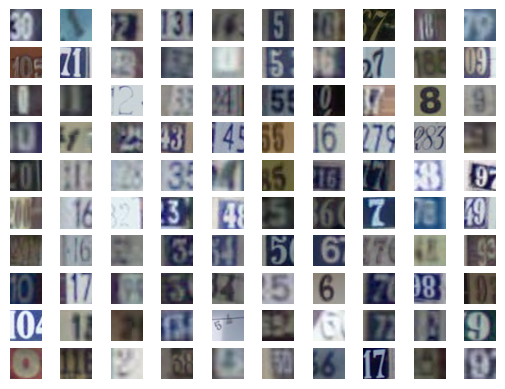

In [4]:
samples_per_class = 10  # Number of samples per class to visualize
classes = 10
plot_index = 1
for example_index in range(samples_per_class):
    for class_index in range(classes):
        plt.subplot(samples_per_class, classes, plot_index)
        train_class = train_X[train_y == class_index]
        image = train_class[np.random.choice(train_class.shape[0], 1)[0]]
        plt.imshow(image.astype(np.uint8))
        plt.axis('off')
        plot_index += 1

# Сначала реализуем KNN для бинарной классификации

В качестве задачи бинарной классификации мы натренируем модель, которая будет отличать цифру 0 от цифры 9.

In [5]:
# First, let's prepare the labels and the source data

# Only select 0s and 9s
binary_train_mask = (train_y == 0) | (train_y == 9)
binary_train_X = train_X[binary_train_mask]
binary_train_y = train_y[binary_train_mask] == 0

binary_test_mask = (test_y == 0) | (test_y == 9)
binary_test_X = test_X[binary_test_mask]
binary_test_y = test_y[binary_test_mask] == 0

# Reshape to 1-dimensional array [num_samples, 32*32*3]
binary_train_X = binary_train_X.reshape(binary_train_X.shape[0], -1)
binary_test_X = binary_test_X.reshape(binary_test_X.shape[0], -1)

In [6]:
# Create the classifier and call fit to train the model
# KNN just remembers all the data
knn_classifier = KNN(k=1)
knn_classifier.fit(binary_train_X, binary_train_y)

## Пришло время написать код! 

Последовательно реализуйте функции `compute_distances_two_loops`, `compute_distances_one_loop` и `compute_distances_no_loops`
в файле `knn.py`.

Эти функции строят массив расстояний между всеми векторами в тестовом наборе и в тренировочном наборе.  
В результате они должны построить массив размера `(num_test, num_train)`, где координата `[i][j]` соотвествует расстоянию между i-м вектором в test (`test[i]`) и j-м вектором в train (`train[j]`).

**Обратите внимание** Для простоты реализации мы будем использовать в качестве расстояния меру L1 (ее еще называют [Manhattan distance](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D1%81%D0%BA%D0%B8%D1%85_%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B0%D0%BB%D0%BE%D0%B2)).

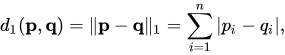

In [7]:
# %%time
# # TODO: implement compute_distances_two_loops in knn.py
# dists = knn_classifier.compute_distances_two_loops(binary_test_X)
# assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))

In [8]:
# %%time
# # TODO: implement compute_distances_one_loop in knn.py
# dists = knn_classifier.compute_distances_one_loop(binary_test_X)
# assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))

In [9]:
%%time
# TODO: implement compute_distances_no_loops in knn.py
dists = knn_classifier.compute_distances_no_loops(binary_test_X)
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))


CPU times: user 445 ms, sys: 18.3 ms, total: 464 ms
Wall time: 474 ms


In [10]:
# # Lets look at the performance difference
# %timeit knn_classifier.compute_distances_two_loops(binary_test_X)
# %timeit knn_classifier.compute_distances_one_loop(binary_test_X)
# %timeit knn_classifier.compute_distances_no_loops(binary_test_X)

In [11]:
# TODO: implement predict_labels_binary in knn.py
prediction = knn_classifier.predict(binary_test_X)
prediction


array([False,  True,  True,  True, False, False,  True, False,  True,
       False,  True, False, False,  True,  True,  True, False, False,
       False, False, False,  True,  True,  True,  True,  True, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True, False, False,  True, False, False, False,  True, False,
        True,  True, False,  True, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
        True, False, False,  True,  True, False,  True, False, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True, False, False, False, False,  True,  True,
       False,  True, False, False, False,  True,  True, False,  True,
       False,  True, False,  True,  True,  True, False,  True,  True,
        True, False,

In [12]:
len(prediction)

144

In [13]:
# TODO: implement binary_classification_metrics in metrics.py
precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
print("KNN with k = %s" % knn_classifier.k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1)) 

KNN with k = 1
Accuracy: 0.69, Precision: 0.69, Recall: 0.74, F1: 0.71


In [14]:
# Let's put everything together and run KNN with k=3 and see how we do
knn_classifier_3 = KNN(k=5)
knn_classifier_3.fit(binary_train_X, binary_train_y)
prediction = knn_classifier_3.predict(binary_test_X)

precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
print("KNN with k = %s" % knn_classifier_3.k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1)) 

KNN with k = 5
Accuracy: 0.67, Precision: 0.67, Recall: 0.74, F1: 0.70


# Кросс-валидация (cross-validation)

Попробуем найти лучшее значение параметра k для алгоритма KNN! 

Для этого мы воспользуемся k-fold cross-validation (https://en.wikipedia.org/wiki/Cross-validation_(statistics)#k-fold_cross-validation). Мы разделим тренировочные данные на 5 фолдов (folds), и по очереди будем использовать каждый из них в качестве проверочных данных (validation data), а остальные -- в качестве тренировочных (training data).

В качестве финальной оценки эффективности k мы усредним значения F1 score на всех фолдах.
После этого мы просто выберем значение k с лучшим значением метрики.

*Бонус*: есть ли другие варианты агрегировать F1 score по всем фолдам? Напишите плюсы и минусы в клетке ниже.

In [15]:
%%time
# Find the best k using cross-validation based on F1 score
num_folds = 5
train_folds_X = []
train_folds_y = []

# TODO: split the training data in 5 folds and store them in train_folds_X/train_folds_y

k_choices = [1, 2, 3, 5, 8, 10, 15, 20, 25, 50]
k_to_f1 = {}  # dict mapping k values to mean F1 scores (int -> float)

for k in k_choices:
    # TODO: perform cross-validation
    # Go through every fold and use it for testing and all other folds for training
    # Perform training and produce F1 score metric on the validation dataset
    # Average F1 from all the folds and write it into k_to_f1
    num_samples = round(len(binary_train_X) / 5)

    f1s = []
    for i in range(num_folds):
        # i folds
        start, end = i * num_samples, (i+1) * num_samples
        fold_val_X = binary_train_X[start:end]
        fold_val_y = binary_train_y[start:end]
        fold_train_X = np.concatenate((binary_train_X[:start], binary_train_X[end:]))
        fold_train_y = np.concatenate((binary_train_y[:start], binary_train_y[end:]))

        # train_folds_X.append(binary_train_X[start:end])
        # train_folds_y.append(binary_train_y[start:end])
        
        # fit predict on each fold
        knn_classifier = KNN(k=k)
        knn_classifier.fit(fold_train_X, fold_train_y)
        prediction = knn_classifier.predict(fold_val_X)

        precision, recall, f1, accuracy = binary_classification_metrics(prediction, fold_val_y)
        f1s.append(f1)
    k_to_f1[k] = sum(f1s) / len(f1s)


for k in sorted(k_to_f1):
    print('k = %d, f1 = %f' % (k, k_to_f1[k]))

k = 1, f1 = 0.631647
k = 2, f1 = 0.524456
k = 3, f1 = 0.661135
k = 5, f1 = 0.663338
k = 8, f1 = 0.605035
k = 10, f1 = 0.606744
k = 15, f1 = 0.648300
k = 20, f1 = 0.611319
k = 25, f1 = 0.637845
k = 50, f1 = 0.603540
CPU times: user 29.6 s, sys: 289 ms, total: 29.9 s
Wall time: 30.1 s


<function matplotlib.pyplot.show(close=None, block=None)>

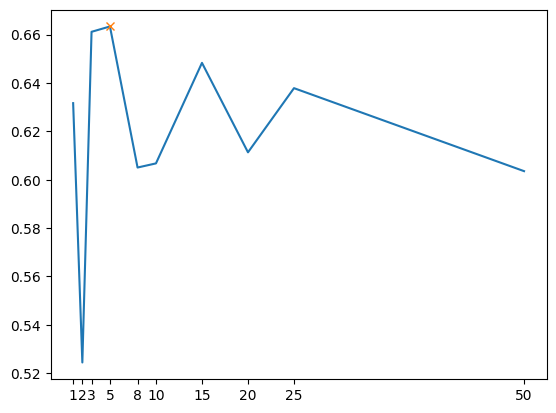

In [16]:
f1_results = [k_to_f1[k] for k in k_choices]
max_f1_idx = np.argmax(f1_results)

plt.plot(k_choices, f1_results)
plt.plot(k_choices[max_f1_idx], np.max(f1_results), "x")
plt.xticks(k_choices)
plt.show

### Проверим, как хорошо работает лучшее значение k на тестовых данных (test data)

In [17]:
%%time
# TODO Set the best k to the best value found by cross-validation
best_k = 5

best_knn_classifier = KNN(k=best_k)
best_knn_classifier.fit(binary_train_X, binary_train_y)
prediction = best_knn_classifier.predict(binary_test_X)

precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
print("Best KNN with k = %s" % best_k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1)) 

Best KNN with k = 5
Accuracy: 0.67, Precision: 0.67, Recall: 0.74, F1: 0.70
CPU times: user 431 ms, sys: 6.47 ms, total: 437 ms
Wall time: 439 ms


# Многоклассовая классификация (multi-class classification)

Переходим к следующему этапу - классификации на каждую цифру.

In [18]:
# Now let's use all 10 classes
train_X = train_X.reshape(train_X.shape[0], -1)
test_X = test_X.reshape(test_X.shape[0], -1)

knn_classifier = KNN(k=1)
knn_classifier.fit(train_X, train_y)

In [19]:
# TODO: Implement predict_labels_multiclass
predict = knn_classifier.predict(test_X)

In [20]:
# TODO: Implement multiclass_accuracy
accuracy = multiclass_accuracy(predict, test_y)
print("Accuracy: %4.2f" % accuracy)

Accuracy: 0.33


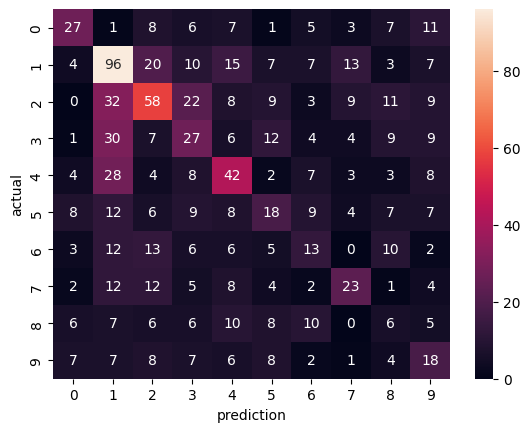

In [21]:
cm = confusion_matrix(test_y, predict)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('prediction')
plt.ylabel('actual')
plt.show()

Снова кросс-валидация. Теперь нашей основной метрикой стала точность (accuracy), и ее мы тоже будем усреднять по всем фолдам.

In [22]:
def kfolds(num_folds, X):
    n_samples = X.shape[0]

    fold_sizes = np.full(num_folds, n_samples // num_folds, dtype=int)
    fold_sizes[: n_samples % num_folds] += 1 # if cant be split evenly

    indices = np.arange(n_samples)
    folds = []

    current = 0
    for fold_size in fold_sizes:
        start, stop = current, current + fold_size
        folds.append(indices[start:stop])
        current = stop
    return folds

In [23]:
%%time
# Find the best k using cross-validation based on accuracy
num_folds = 5
# train_folds_X = []
# train_folds_y = []

# TODO: split the training data in 5 folds and store them in train_folds_X/train_folds_y

k_choices = [1, 2, 3, 5, 8, 10, 15, 20, 25, 50]
k_to_accuracy = {}

for k in k_choices:
    # TODO: perform cross-validation
    # Go through every fold and use it for testing and all other folds for validation
    # Perform training and produce accuracy metric on the validation dataset
    # Average accuracy from all the folds and write it into k_to_accuracy

    res = []
    for fold_indices in kfolds(num_folds, train_X):
        fold_val_X, fold_val_y = train_X[fold_indices], train_y[fold_indices]
        fold_train_X, fold_train_y = np.delete(train_X, fold_indices, axis=0), np.delete(train_y, fold_indices, axis=0)
        # print(fold_val_X[-1], fold_train_X[-1])

        knn_classifier = KNN(k=k)
        knn_classifier.fit(fold_train_X, fold_train_y)
        prediction = knn_classifier.predict(fold_val_X)
        accuracy = multiclass_accuracy(prediction, fold_val_y)
        res.append(accuracy)
    
    k_to_accuracy[k] = sum(res) / len(res)
    print('k = %d, accuracy = %f' % (k, k_to_accuracy[k]))


k = 1, accuracy = 0.344300
k = 2, accuracy = 0.344200
k = 3, accuracy = 0.347900
k = 5, accuracy = 0.362400
k = 8, accuracy = 0.367900
k = 10, accuracy = 0.372500
k = 15, accuracy = 0.378100
k = 20, accuracy = 0.373100
k = 25, accuracy = 0.372100
k = 50, accuracy = 0.357100
CPU times: user 30min 29s, sys: 7.54 s, total: 30min 37s
Wall time: 30min 44s


<function matplotlib.pyplot.show(close=None, block=None)>

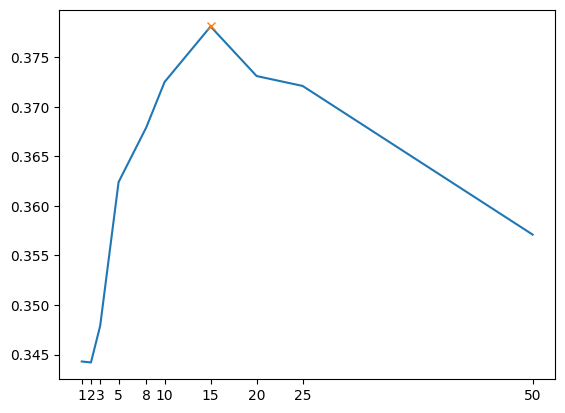

In [24]:
acc_results = [k_to_accuracy[k] for k in k_choices]
max_f1_idx = np.argmax(acc_results)

plt.plot(k_choices, acc_results)
plt.plot(k_choices[max_f1_idx], np.max(acc_results), "x")
plt.xticks(k_choices)
plt.show

### Финальный тест - классификация на 10 классов на тестовой выборке (test data)

Если все реализовано правильно, вы должны увидеть точность не менее **0.2**.

In [25]:
%%time
# TODO Set the best k as a best from computed
best_k = 8

best_knn_classifier = KNN(k=best_k)
best_knn_classifier.fit(train_X, train_y)
prediction = best_knn_classifier.predict(test_X)

# Accuracy should be around 20%!
accuracy = multiclass_accuracy(prediction, test_y)
print("Accuracy: %4.2f" % accuracy)

Accuracy: 0.34
CPU times: user 22.9 s, sys: 103 ms, total: 23 s
Wall time: 23.2 s


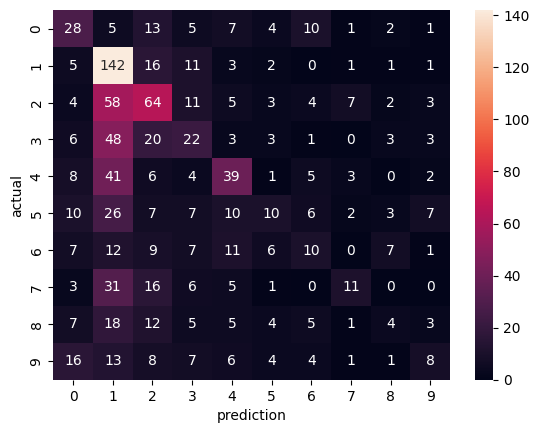

In [26]:
cm = confusion_matrix(test_y, prediction)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('prediction')
plt.ylabel('actual')
plt.show()

# dimensionality reduction

## PCA

In [27]:
from sklearn.decomposition import PCA

In [28]:
# from plotly.express import scatter_3d

# pca = PCA(n_components=3)
# X_new = pca.fit_transform(train_X)
# X_new.shape

# x, y, z = X_new.T
# scatter_3d(x=x, y=y, z=z, color=train_y)

In [29]:
pca = PCA(n_components=2, svd_solver="randomized", iterated_power=1000, random_state=47)
X_new = pca.fit_transform(train_X)
X_new.shape

(10000, 2)

In [30]:
X_new[0][0], X_new[0][1], X_new.T[0][0], X_new.T[1][0]

(1472.9861, -59.78315, 1472.9861, -59.78315)

<Axes: >

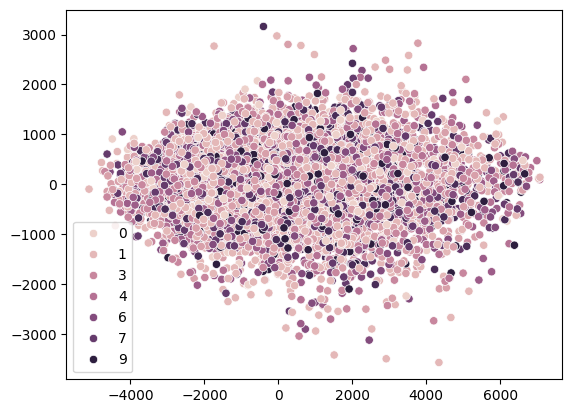

In [31]:
x, y = X_new.T
sns.scatterplot(x=x, y=y, hue=train_y)

## LDA

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

<Axes: >

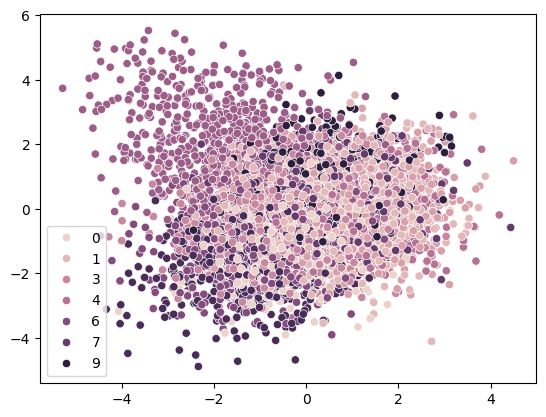

In [33]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_new = lda.fit_transform(train_X, train_y)

x, y = X_new.T
sns.scatterplot(x=x, y=y, hue=train_y)

In [34]:
# from plotly.express import scatter_3d

# lda = LinearDiscriminantAnalysis(n_components=3)
# X_new = lda.fit_transform(train_X, train_y)

# x, y, z = X_new.T
# scatter_3d(x=x, y=y, z=z, color=train_y)

<Axes: >

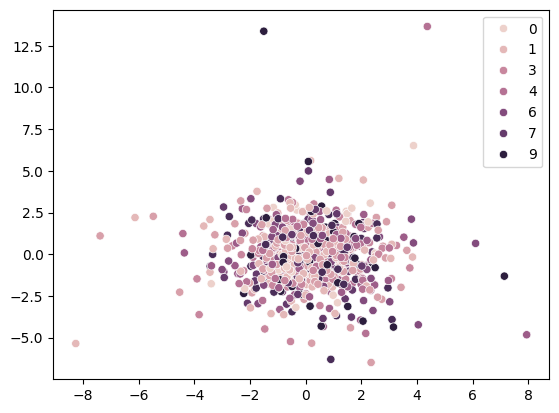

In [35]:
X_test_new = lda.transform(test_X)

x, y = X_test_new.T
sns.scatterplot(x=x, y=y, hue=test_y)